## CUSTOMER CHURN PREDICTION - Vodafone Coporation

### Introduction:
Customer churn prediction is a critical task for businesses operating in subscription-based industries such as telecommunications, software as a service (SaaS), and retail. Churn refers to the phenomenon where customers discontinue their relationship with a company or (unsubscribe) stop using its services. It is essential for businesses to identify and understand the factors that contribute to churn in order to take proactive measures to retain customers and maximize revenue.

### Business Understanding:
#### **Project Scenario**

In today's world of machine leaening, most companies build classification models to perform churn analysis on their customers. We have been tasked to create a prediction model for a telecommunication compant to help predict if a customer will churn or not. We are also to help them understand their data and know what factors affect the rate at which customers stop using their network to understand their data.

#### **Hypothesis**
 Null hypothesis - There is a dominant attribute that affects churn
   
 
Alternative hypothesis - There is no dominant attribute that affects churn

#### **Analytical Questions**
 
1. What is the total churn rate?
2. How does the different boolean attributes affect the churn?
3. How does the different non-boolean attributes affect the churn?
4. How does the different numerical attributes affect the churn?
5. How does tenure affect the churn?
6. How does the type of internet service affect churn?
7. How does the type of contract affect the churn?
8. How does the type of payment method affect the churn?

### Data Understanding:

The first dataset consists of the first 3000 records of the companies customer churn data. This dataset was stored in a remote database and to access it, a connection to the Microsoft SQL Server database using an Open Database Connectivity (ODBC) library such as pyodbc or an Object-Relational Mapping (ORM) library like SQLAlchemy needs to be established. This allows for querying the database and retrieving the records.

The second dataset is a csv file, with 2000 records and the third dataset is the test dataset.

The following describes the columns present in the data.

| Variable         | Description                                       | Data Type | Possible Values                          |
|------------------|---------------------------------------------------|-----------|------------------------------------------|
| customerID       | Unique identifier for each customer               | String    |                                          |
| gender           | Gender of the customer                            | String    | 'Male', 'Female'                        |
| SeniorCitizen    | Indicates if the customer is a senior citizen     | Boolean   | True (1), False (0)                     |
| Partner          | Indicates if the customer has a partner           | Boolean   | True (1), False (0)                     |
| Dependents       | Indicates if the customer has dependents          | Boolean   | True (1), False (0)                     |
| tenure           | Number of months the customer has been with the company | Integer |                                          |
| PhoneService     | Indicates if the customer has phone service       | Boolean   | True (1), False (0)                     |
| MultipleLines    | Indicates if the customer has multiple lines      | String    | 'Yes', 'No', 'No phone service'        |
| InternetService  | Type of internet service                          | String    | 'DSL', 'Fiber optic', 'No'             |
| OnlineSecurity   | Indicates if the customer has online security     | String    | 'Yes', 'No', 'No internet service'     |
| DeviceProtection | Indicates if the customer has device protection   | String    | 'Yes', 'No', 'No internet service'     |
| TechSupport      | Indicates if the customer has tech support        | String    | 'Yes', 'No', 'No internet service'     |
| StreamingTV      | Indicates if the customer has streaming TV        | String    | 'Yes', 'No', 'No internet service'     |
| StreamingMovies  | Indicates if the customer has streaming movies    | String    | 'Yes', 'No', 'No internet service'     |
| Contract         | Type of contract                                  | String    | 'Month-to-month', 'One year', 'Two year' |
| PaperlessBilling | Indicates if the customer has paperless billing  | Boolean   | True (1), False (0)                     |
| PaymentMethod    | Payment method                                    | String    | 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)' |
| MonthlyCharges   | Monthly charges                                   | Float     |                                          |
| TotalCharges     | Total charges                                     | Float     |                                          |
| Churn            | Indicates if the customer churned                | Boolean   | True (1), False 

#### **Data Connection**

In [124]:
# Import the necessary packages
# Data handling
import pyodbc
import pandas as pd
import numpy as np

# For creating connection
import pyodbc
import requests

# For loading environment variables
from dotenv import dotenv_values
import dotenv
import io

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stat
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as stats
import random

# Other packages
import os
import warnings
warnings.filterwarnings('ignore')

In [125]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [126]:
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [127]:
#creating a connection sring to the SQL  database
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [128]:
#creating a connection
connection = pyodbc.connect(connection_string)

##### *Load the First Dataset*

In [129]:
# Loading the first data set from the database
query = "Select * from dbo.LP2_Telco_churn_first_3000"

data1 = pd.read_sql(query, connection)

In [130]:
# The first five rows of the first dataset
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [131]:
# Description of the data 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [132]:
# Missing values
data1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [133]:
# The dataset's column numbers and rows
data1.shape

(3000, 21)

In [134]:
# Checking if there are duplicates
data1.duplicated().sum()

0

In [135]:
# Filling the churn missing value. The churn column has one missing value. Therefore decided to fill with false which is the most frequent entry  data1['Churn'].fillna(False)
data1['Churn'].fillna(False, inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


##### *Load the Second Dataset*

In [136]:
# Loading the second dataset from the Data directory
# csv_file_path = 'Data/LP2_Telco-churn-second-2000.csv'

# Load the CSV file into a pandas DataFrame
# data2 = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
# data2.head()

# Loading the second dataset from a GitHub repository
url = 'https://raw.github.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-second-2000.csv'
download = requests.get(url).content
data2 = pd.read_csv(io.StringIO(download.decode('utf-8')))
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [137]:
# view of the data information, no missing data here
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


##### *Observations of the First (data1) and Second (data2) Dataset*
data1
- The data has missing values
- The dataset has 3000 rows and 21 columns
- There are no duplicates

data2
- There are no missing values
- The totalcharges column is an object instead of a float
- The dataset has 2043 rows and 21 columns


#### **Cleaning the Training Dataset**
1. Replace the NaN values in the totalcharges column in data2 then change the data type from object to float

2. Concatinate the dataset

In [138]:
def replace_nan_and_convert_to_float(df, column_name):
    """
    Replaces NaN values with zero and converts the column type to float for a specified column.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the column to process.
    - column_name (str): The name of the column to process.
    
    Returns:
    - pd.DataFrame: DataFrame with NaN values replaced and specified column converted to float.
    """
    # Convert column to numeric, setting errors ='coerce' to convert non-numeric values to NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
    # Replace NaN values with 0
    df['TotalCharges'] = df['TotalCharges'].fillna(0)
    return df


df = pd.DataFrame(data2)

# Process the 'TotalCharges' column: replace NaN with zero and convert to float

df = replace_nan_and_convert_to_float(df, 'TotalCharges')

print("\nDataFrame after processing")
clean_data2 = df
clean_data2.head()


DataFrame after processing


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [139]:
# Concat the two data sets after cleaning i.e changing the totalcharges datatype and filling the missing value in churn column in data1
training_data = pd.concat([data1, clean_data2], axis = 0,ignore_index = True)
training_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [140]:
# Training data info after concatinating
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [141]:
#Saving the combined dataset
training_data.to_csv('telco_churn.csv')

#### **Exploratory Data Analysis**

In [142]:
# Summary statistics of numerical columns
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002
TotalCharges,5038.0,2300.692041,2269.502705,0.0,417.125,1400.699988,3860.599976,8670.100000


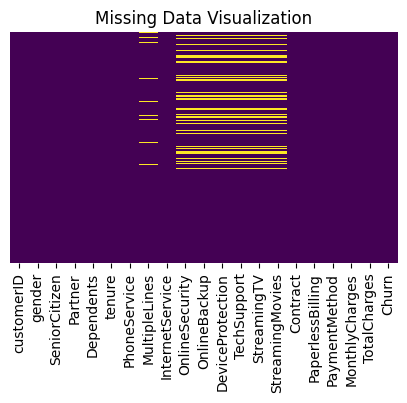

Missing Values Summary:
 customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64


In [143]:
# Visualize the missing values
# Checking for missing values in the training data
missing_values = training_data.isnull().sum()

# Visualize the data
plt.figure(figsize=(5,3))
sns.heatmap(training_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display the missing values summary
print('Missing Values Summary:\n', missing_values)

                              

In [144]:
# Checking for duplicates on the training data
training_data.duplicated().sum()

0

In [145]:
# Convert the churn column to boolean from object since it is the 'predicted column'

def convert_to_yes_no(df, columns):
    """
    Converts multiple columns with mixed values (True, False, Yes, No) to only Yes and No.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the columns to be converted.
    - columns (list of str): List of column names to convert.
    
    Returns:
    - pd.DataFrame: DataFrame with the specified columns converted to Yes and No.
    """
    # Define a mapping from the original values to the new values
    conversion_map = {
        True: 'Yes',
        'True': 'Yes',
        False: 'No',
        'False': 'No',
        'Yes': 'Yes',
        'No': 'No',
        'yes': 'Yes',
        'no': 'No',
        'YES': 'Yes',
        'NO': 'No',
        # 'Y': 'Yes',
        # 'N': 'No'        
    }

    # Apply the conversion map to the specified columns
    for column in columns:
        if column in df.columns:
            df[column] = df[column].map(conversion_map)

    return df

# Assuming 'training_data' is your DataFrame and already defined
# Example column names to be converted
columns_to_convert = ['Churn','Partner', 'Dependents', 'PhoneService']

# Convert specified columns to only contain Yes and No
df = convert_to_yes_no(training_data, columns_to_convert)

print("\nDataFrame after prepocessing")
clean_train_data=df

clean_train_data.head()


DataFrame after prepocessing


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,Yes


In [146]:
# Convert monthlycharges and totalcharges column datatype to int
df = pd.DataFrame(clean_train_data)

# Fill NaN values with 0
df['TotalCharges'].fillna(0, inplace=True)

# Convert columns from float to int
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)
df['TotalCharges'] = df['TotalCharges'].astype(int)


# Display the DataFrame after conversion
print('\nDataFrame after converting float to int')
clean_train_data = df


DataFrame after converting float to int


In [147]:
# Drop the 'customerID' column
clean_training_data = clean_train_data.drop('customerID', axis=1)

# Display the DataFrame
print("\nDataFrame after dropping the 'customerID' column:")
print(clean_training_data.head())


DataFrame after dropping the 'customerID' column:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0          None             DSL          False         True            False   
1         False             DSL           True        False             True   
2         False             DSL           True         True            False   
3          None             DSL           True        False             True   
4         False     Fiber optic          False        False            False   

  TechSupport StreamingTV StreamingMovies        Contract P

In [148]:
clean_training_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29,29,No
1,Male,0,No,No,34,Yes,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56,1889,No
2,Male,0,No,No,2,Yes,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53,108,Yes
3,Male,0,No,No,45,No,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42,1840,No
4,Female,0,No,No,2,Yes,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70,151,Yes


In [149]:
clean_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            5043 non-null   object
 1   SeniorCitizen     5043 non-null   int64 
 2   Partner           5043 non-null   object
 3   Dependents        5043 non-null   object
 4   tenure            5043 non-null   int64 
 5   PhoneService      5043 non-null   object
 6   MultipleLines     4774 non-null   object
 7   InternetService   5043 non-null   object
 8   OnlineSecurity    4392 non-null   object
 9   OnlineBackup      4392 non-null   object
 10  DeviceProtection  4392 non-null   object
 11  TechSupport       4392 non-null   object
 12  StreamingTV       4392 non-null   object
 13  StreamingMovies   4392 non-null   object
 14  Contract          5043 non-null   object
 15  PaperlessBilling  5043 non-null   object
 16  PaymentMethod     5043 non-null   object
 17  MonthlyCharges

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

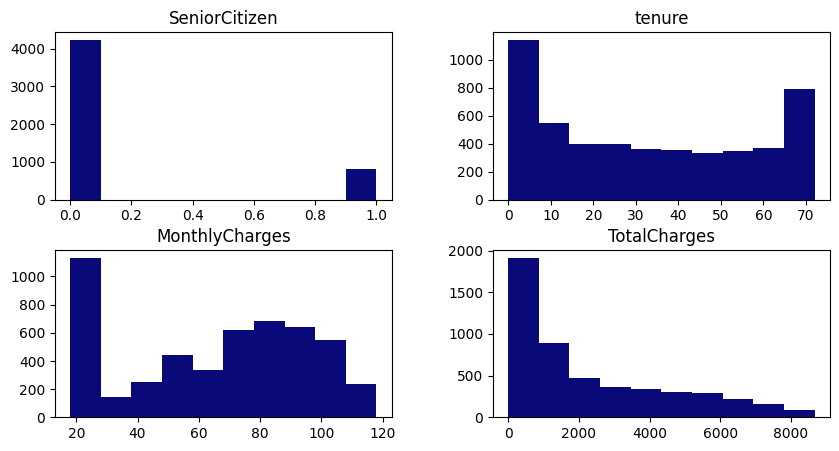

In [150]:
# Numerical column visual representation using histogram
clean_training_data.hist(figsize=(10,5), grid=False, color='#090979')

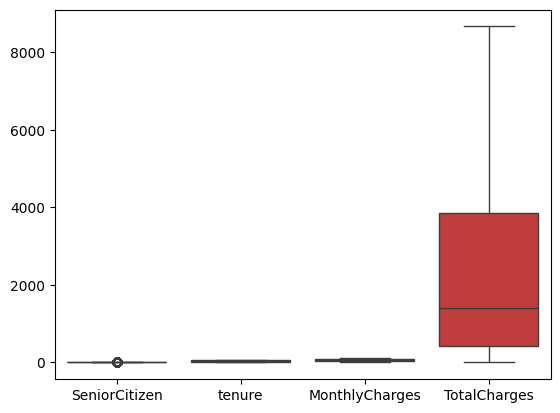

In [151]:
# Checking outliers
sns.boxplot(clean_training_data, orient='v')
plt.show()

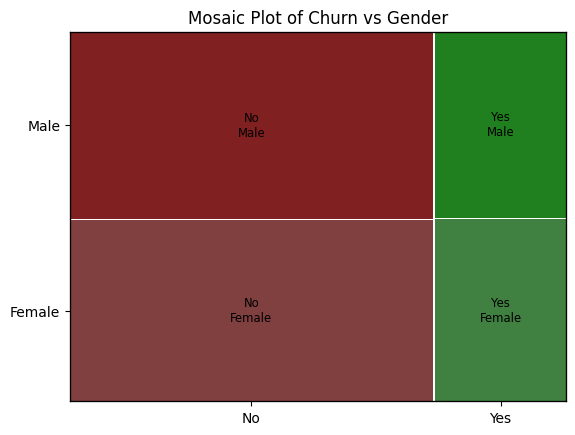

In [152]:
mosaic(clean_training_data, ['Churn', 'gender'], title='Mosaic Plot of Churn vs Gender')
plt.show()